# THE SPARK FOUNDATION (GRIP) INTERNSHIP PROGRAM

# By Prasad Chavan

# Task 2 : Prediction using Unsupervised ML


# In this task we have given iris dataset and we have to predict the optimum number of clusters and represents it visually.

In [68]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings as wg
wg.filterwarnings('ignore')


In [69]:
# Reading the data from remote url
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring Data

In [70]:
df.shape

(150, 6)

In [71]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [73]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now we will have to drop target i.e 'Species' column because it is a unsupervised learning problem

In [75]:
df.drop(['Species','Id'],axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Visualization 

<AxesSubplot:xlabel='SepalLengthCm'>

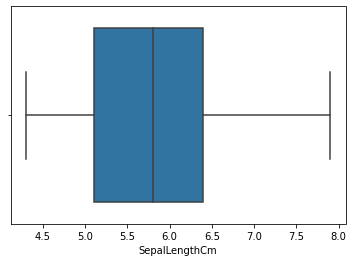

In [76]:
import seaborn as sns
sns.boxplot(x= df['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm'>

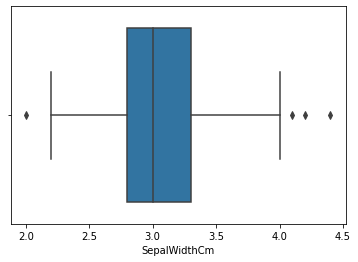

In [77]:
sns.boxplot(x = df['SepalWidthCm'])


<AxesSubplot:xlabel='PetalLengthCm'>

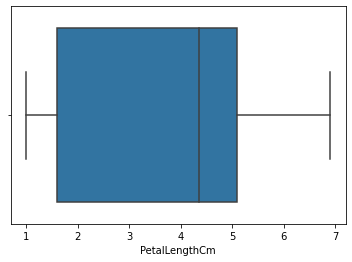

In [78]:
sns.boxplot(x= df['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm'>

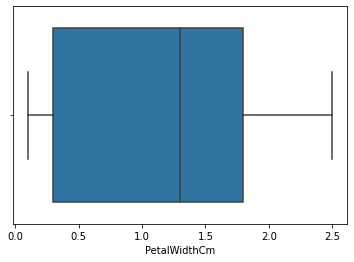

In [79]:
sns.boxplot(x= df['PetalWidthCm'])

From the above isualization we can clearly see that there are outliers are present in SepalWidthCm column .

In [80]:
scaler = MinMaxScaler()

In [81]:
X = scaler.fit_transform(df)

# Finding optimum number of clusters 

Here we use Elbow method to find optimum number of clusters 

In [82]:
sum_squared_error = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sum_squared_error.append(km.inertia_)
    

In [83]:
sum_squared_error

[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.31787321428571,
 46.535582051282056,
 38.930963049671746,
 34.198464618714624,
 30.077530998389694,
 27.94329182090052]

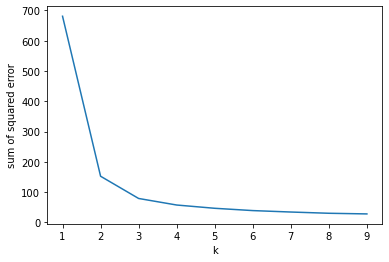

In [84]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sum_squared_error)

# Training a model

In [85]:
model = KMeans(n_clusters=3,random_state=10)
model.fit(X)

KMeans(n_clusters=3, random_state=10)

In [86]:
pred = model.predict(X)

In [87]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

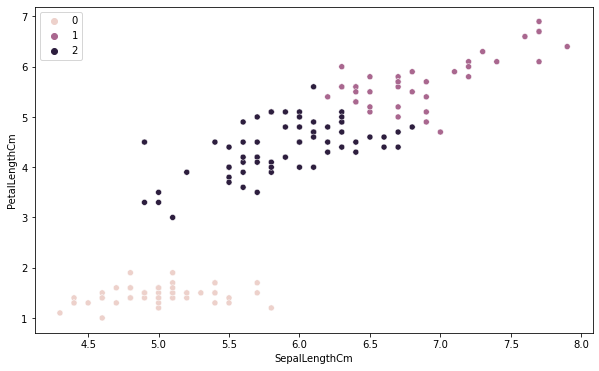

In [89]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['SepalLengthCm'],y = df['PetalLengthCm'],hue = pred)